In [1]:
#%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


truck plane truck  ship


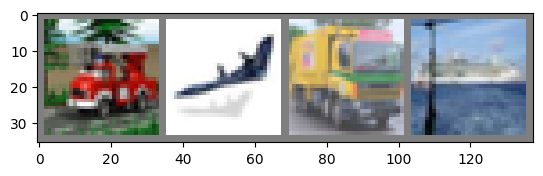

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 0.745
[1,   200] loss: 0.747
[1,   300] loss: 0.692
[1,   400] loss: 0.751
[1,   500] loss: 0.733
[1,   600] loss: 0.726
[1,   700] loss: 0.738
[1,   800] loss: 0.795
[1,   900] loss: 0.670
[1,  1000] loss: 0.806
[1,  1100] loss: 0.704
[1,  1200] loss: 0.713
[1,  1300] loss: 0.709
[1,  1400] loss: 0.817
[1,  1500] loss: 0.696
[1,  1600] loss: 0.771
[1,  1700] loss: 0.765
[1,  1800] loss: 0.690
[1,  1900] loss: 0.742
[1,  2000] loss: 0.828
[1,  2100] loss: 0.799
[1,  2200] loss: 0.864
[1,  2300] loss: 0.690
[1,  2400] loss: 0.779
[1,  2500] loss: 0.734
[1,  2600] loss: 0.706
[1,  2700] loss: 0.812
[1,  2800] loss: 0.758
[1,  2900] loss: 0.778
[1,  3000] loss: 0.769
[1,  3100] loss: 0.838
[1,  3200] loss: 0.786
[1,  3300] loss: 0.803
[1,  3400] loss: 0.721
[1,  3500] loss: 0.748
[1,  3600] loss: 0.757
[1,  3700] loss: 0.724
[1,  3800] loss: 0.777
[1,  3900] loss: 0.814
[1,  4000] loss: 0.732
[1,  4100] loss: 0.841
[1,  4200] loss: 0.786
[1,  4300] loss: 0.781
[1,  4400] 

In [11]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 61 %
